In [1]:
import PIL.Image
import PIL.ImageDraw
import matplotlib.pyplot as plt
import cv2
import numpy as np

from deepface import DeepFace

Using TensorFlow backend.


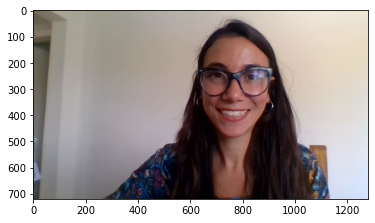

In [2]:
# Load image
image = cv2.imread("vicky.jpg")
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
# Prediction of emotion, gender, age, race
results = DeepFace.analyze(image)
print(results["age"]," years old ",results["dominant_race"]," ",results["dominant_emotion"]," ", results["gender"])

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.00it/s]

30  years old  asian   happy   Man


In [7]:
print(results)


{'emotion': {'angry': 5.750841647386551, 'disgust': 0.00034526399304013466, 'fear': 29.72882390022278, 'happy': 0.017659840523265302, 'sad': 13.890612125396729, 'surprise': 0.002533024235162884, 'neutral': 50.6091833114624}, 'dominant_emotion': 'neutral', 'age': 32, 'gender': 'Man', 'race': {'asian': 13.358119926340576, 'indian': 3.745903670543651, 'black': 1.0092706089777117, 'white': 44.19111872858517, 'middle eastern': 15.588151847609987, 'latino hispanic': 22.107435590471958}, 'dominant_race': 'white'}


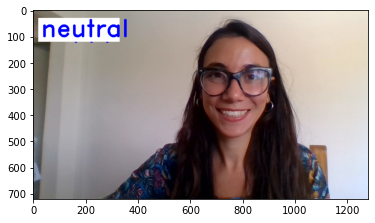

In [8]:
cv2.rectangle(image, (20, 30), (330, 120), (255, 255, 255), cv2.FILLED)
cv2.putText(image, results['dominant_emotion'], (30,100), cv2.FONT_HERSHEY_DUPLEX, 3.0, (255, 0, 0), 5)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
# Take capture of camera
camera = cv2.VideoCapture(0)
f_resize = 2
while True:
    # Take a single frame of video
    _, frame = camera.read()

    # Resize frame of video 
    frame_resized = cv2.resize(frame, (0, 0), fx=1/f_resize, fy=1/f_resize)
    #frame_resized = cv2.cvtColor(frame_resized,cv2.COLOR_BGR2RGB)
    
    results = DeepFace.analyze(frame_resized, actions = ['emotion'])
    cv2.putText(frame, results['dominant_emotion'], (60,60), cv2.FONT_HERSHEY_DUPLEX, 1.0, (0, 0, 255), 1)
    
    # Display the resulting image
    cv2.imshow('Video', frame)

    key = cv2.waitKey(1)
    
    # quit camera if 'q' key is pressed
    if key & 0xFF == ord("q"):
        break

camera.release()
cv2.destroyAllWindows()

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.51it/s]


In [7]:
camera.release()

NameError: name 'camera' is not defined